In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, precision_recall_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

In [2]:
# Load the dataset
df = pd.read_csv("creditcardDataset.csv")

In [3]:
# Display basic information
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
# Display basic information
print(df.describe())

                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [5]:
# 2. Data Wrangling (Preprocessing)
# Check for missing values
print("Check for missing values")
print(df.isnull().sum())

Check for missing values
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


handle outliers


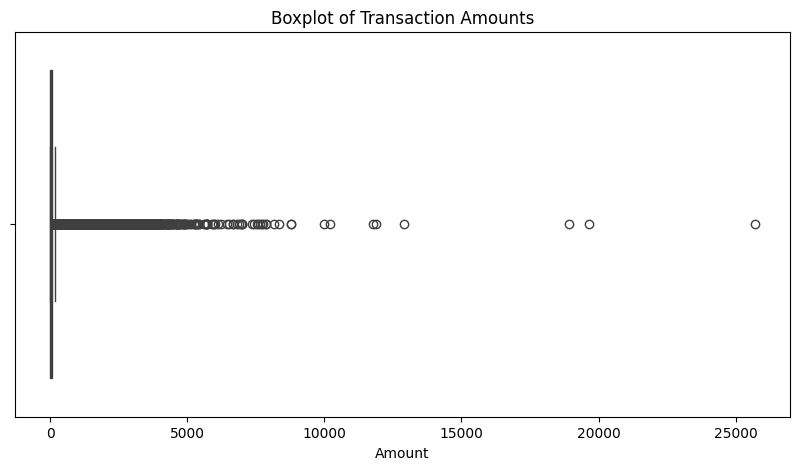

In [6]:
# handle Outliers
print("handle outliers")
# Analyze 'Amount' for outliers using a boxplot
plt.figure(figsize=(10, 5))
sns.boxplot(x=df["Amount"])
plt.title("Boxplot of Transaction Amounts")
plt.show()

In [7]:
# Standardize Features
# Standardize 'Time' and 'Amount'
scaler = StandardScaler()
df["scaled_time"] = scaler.fit_transform(df[["Time"]])
df["scaled_amount"] = scaler.fit_transform(df[["Amount"]])

# Drop original 'Time' and 'Amount' columns
df = df.drop(["Time", "Amount"], axis=1)

In [8]:
# EDA
# fraud vs non-fraud transaction
print("fraud vs non-fraud transaction")
# Check distribution of target variable
fraud_counts = df["Class"].value_counts()
print(fraud_counts)

fraud vs non-fraud transaction
Class
0    284315
1       492
Name: count, dtype: int64


C:\Users\wahaa\AppData\Local\Temp\ipykernel_10404\3520370387.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")


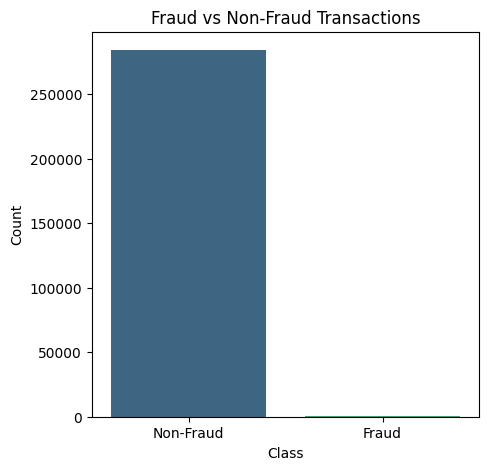

In [9]:
# Plot fraud vs. non-fraud distribution
plt.figure(figsize=(5, 5))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette="viridis")
plt.title("Fraud vs Non-Fraud Transactions")
plt.xticks([0, 1], ["Non-Fraud", "Fraud"])
plt.ylabel("Count")
plt.show()

Feature-Target Relationship


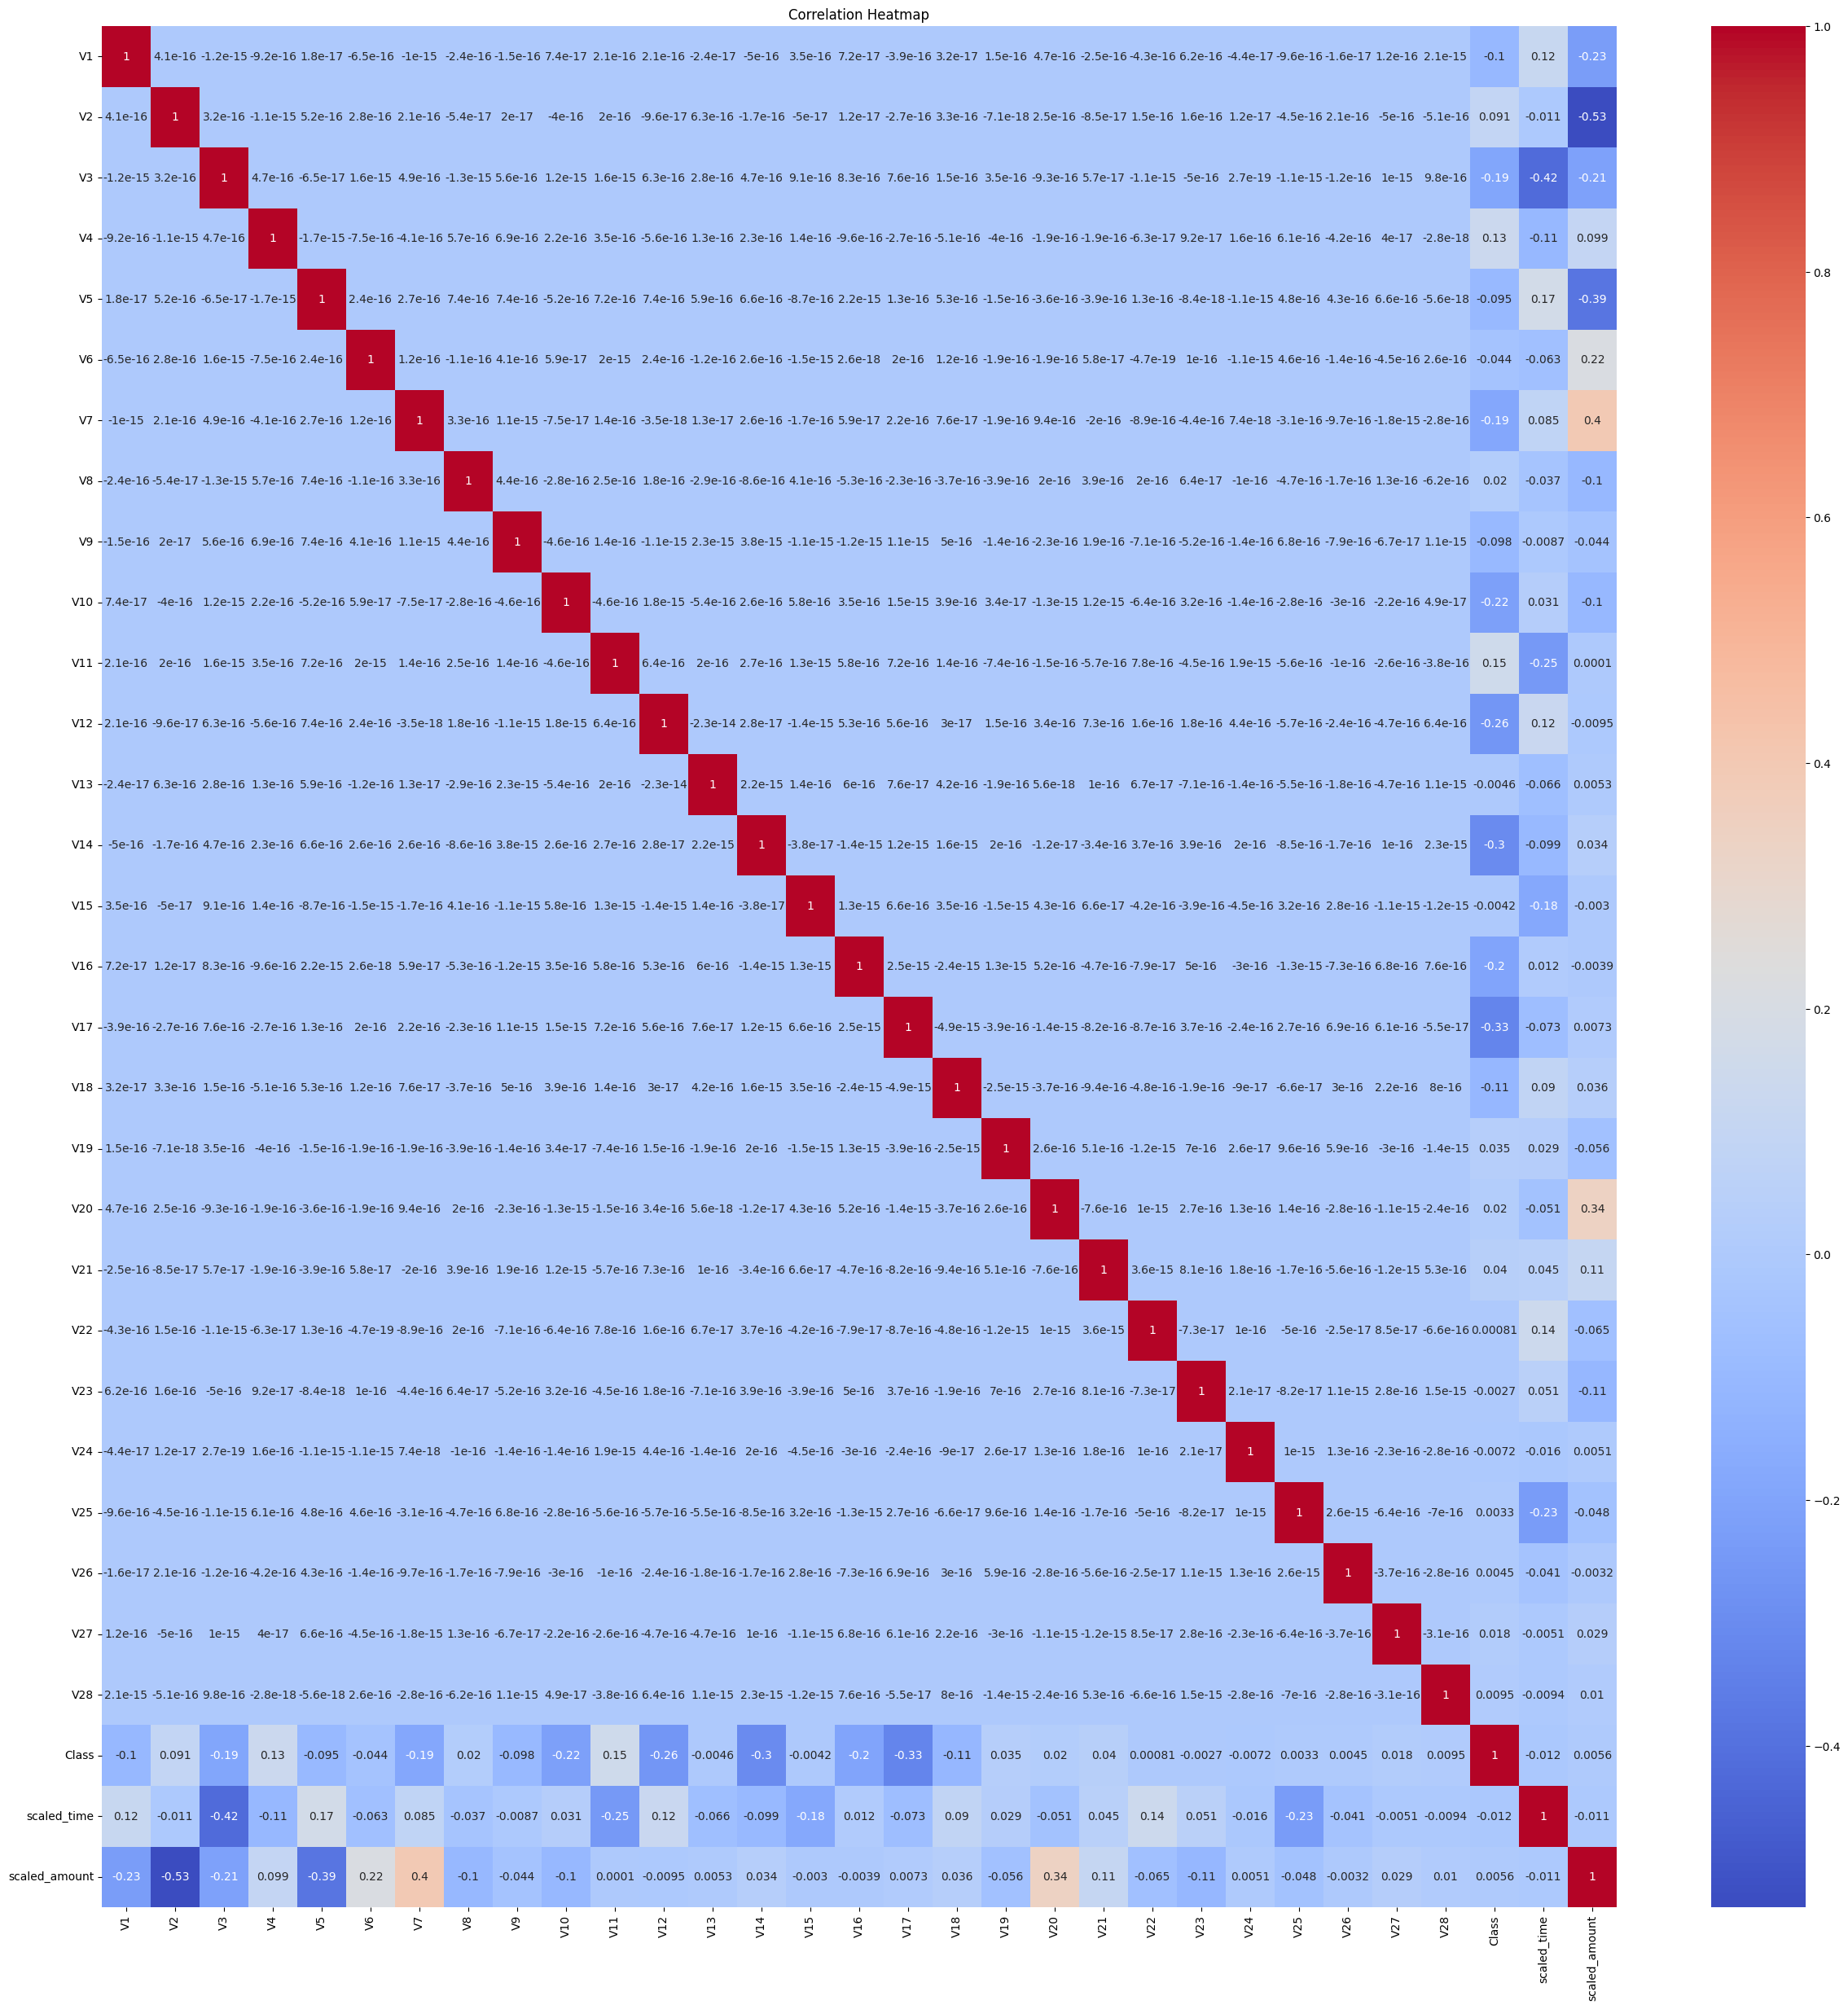

In [15]:
# Feature-Target Relationship
print("Feature-Target Relationship")
# Plot correlation heatmap
plt.figure(figsize=(30, 30))
correlation = df.corr()
sns.heatmap(correlation, cmap="coolwarm", annot=True)
plt.title("Correlation Heatmap")
plt.show()

Feature Analysis


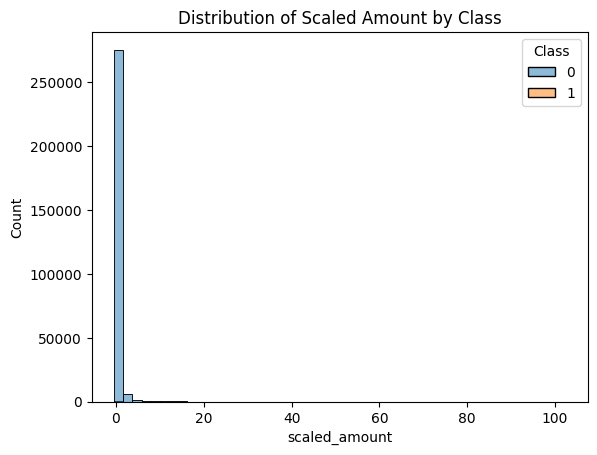

In [12]:
# Feature Analysis
print("Feature Analysis")
# Analyze the relationship between scaled features and target
sns.histplot(data=df, x="scaled_amount", hue="Class",  bins=50)
plt.title("Distribution of Scaled Amount by Class")
plt.show()

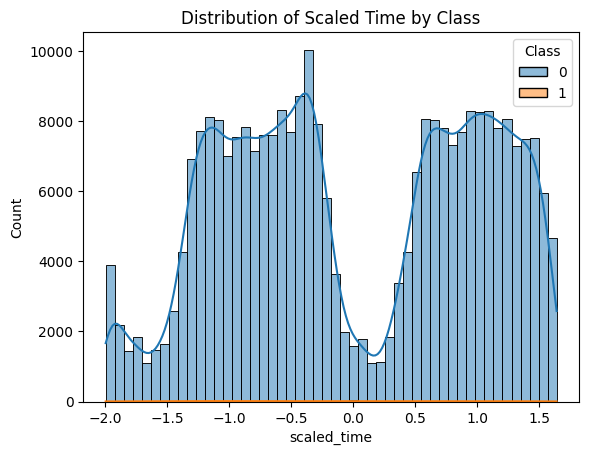

In [13]:
sns.histplot(data=df, x="scaled_time", hue="Class", kde=True, bins=50)
plt.title("Distribution of Scaled Time by Class")
plt.show()

In [13]:
# Predictive Analysis
# Split the Data
print("predictive analysis")
# Separate features and target
X = df.drop("Class", axis=1)
y = df["Class"]

# Split into training and test sets
# (stratify=y) => Ensures that the training and test sets have the same distribution of fraudulent and non-fraudulent transactions .
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
# Train a Random Forest model
rf_model = RandomForestClassifier(
    random_state=42, n_estimators=100, class_weight="balanced"
)
rf_model.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
# This method applies the trained Random Forest model to the input data (X_test) and predicts the output labels (y_pred).
y_pred = rf_model.predict(X_test)

# Evaluate model performance
print(classification_report(y_test, y_pred))

predictive analysis
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.86      0.76      0.81       148

    accuracy                           1.00     85443
   macro avg       0.93      0.88      0.90     85443
weighted avg       1.00      1.00      1.00     85443



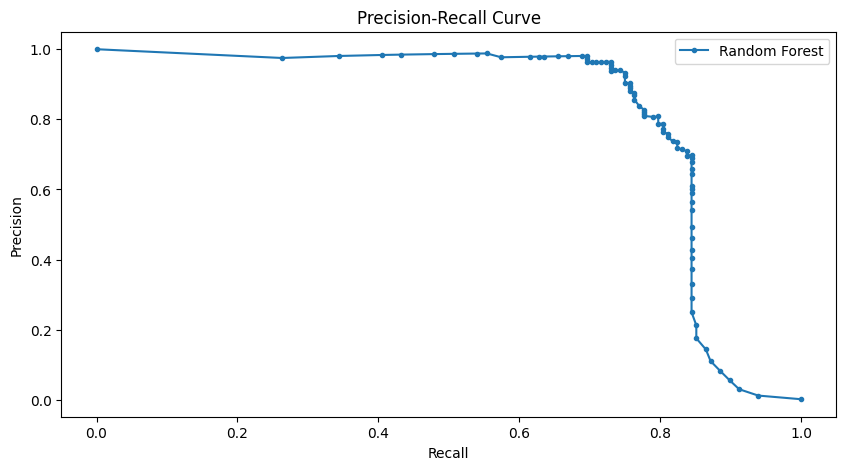

In [14]:
# Precision-Recall Curve
# Compute precision-recall values
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# Plot Precision-Recall Curve
plt.figure(figsize=(10, 5))
plt.plot(recall, precision, marker=".", label="Random Forest")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

In [15]:
# Compute AUC-PR
auc_pr = roc_auc_score(y_test, y_pred_proba)
print(f"AUC-PR: {auc_pr}")

AUC-PR: 0.9618226805855037
